In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv('/content/Amazon Sale Report.csv')
data

/tmp/ipython-input-1570399130.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [ ]:
data.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [ ]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
data.drop_duplicates(inplace=True)

/tmp/ipython-input-2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [ ]:
data.dropna(inplace=True)

/tmp/ipython-input-1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
if 'Amount' in data.columns:data['Amount'] = data['Amount'].replace('[\$,₹,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-173059057.py:1: SyntaxWarning: invalid escape sequence '\$'
  if 'Amount' in data.columns:data['Amount'] = data['Amount'].replace('[\$,₹,]', '', regex=True).astype(float)
/tmp/ipython-input-173059057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if 'Amount' in data.columns:data['Amount'] = data['Amount'].replace('[\$,₹,]', '', regex=True).astype(float)


In [ ]:
if 'Date' in data.columns:data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

/tmp/ipython-input-795571319.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  if 'Date' in data.columns:data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
/tmp/ipython-input-795571319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if 'Date' in data.columns:data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [ ]:
data['Category'] = data['Category'].fillna(data['Category'].mode()[0])

/tmp/ipython-input-3709240657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'] = data['Category'].fillna(data['Category'].mode()[0])


In [ ]:
print("\nCleaned Dataset Shape:", data.shape)
print("\nMissing Values After Cleaning:\n", data.isnull().sum())


Cleaned Dataset Shape: (32338, 23)

Missing Values After Cleaning:
 index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64


Exploratory Data Analysis (EDA)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(data.describe(include='all'))

                index             Order ID                           Date  \
count    32338.000000                32338                          32338   
unique            NaN                29927                            NaN   
top               NaN  404-9932919-6662730                            NaN   
freq              NaN                   11                            NaN   
mean     60920.649174                  NaN  2022-05-11 09:59:08.790896128   
min          1.000000                  NaN            2022-03-31 00:00:00   
25%      27157.000000                  NaN            2022-04-20 00:00:00   
50%      63419.000000                  NaN            2022-05-09 00:00:00   
75%      91754.750000                  NaN            2022-06-01 00:00:00   
max     128891.000000                  NaN            2022-06-29 00:00:00   
std      36849.712239                  NaN                            NaN   

                              Status Fulfilment Sales Channel   \
count    

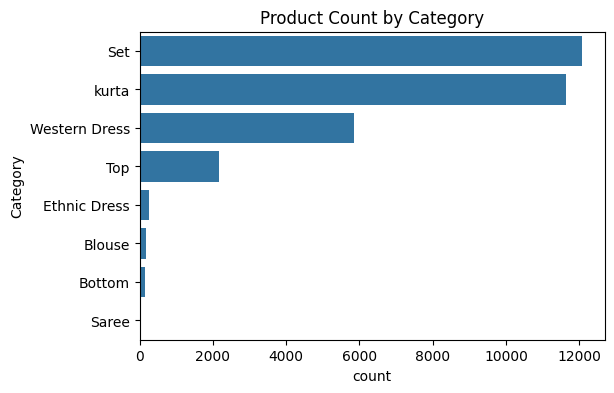

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index)
plt.title("Product Count by Category")
plt.show()

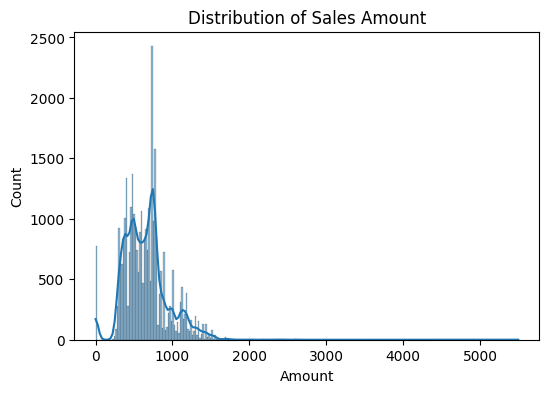

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data['Amount'], kde=True)
plt.title("Distribution of Sales Amount")
plt.show()

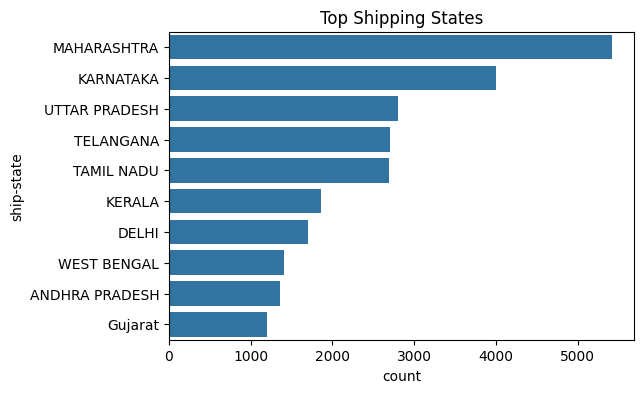

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(y='ship-state', data=data, order=data['ship-state'].value_counts().head(10).index)
plt.title("Top Shipping States")
plt.show()

Store Clean Data in a SQLite Database


In [ ]:
!pip install mysql-connector-python sqlalchemy pymysql

In [ ]:
username = 'root'
password = 'Subash@1805'
host = '127.0.0.1'
database = 'amazon_sales'
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

In [ ]:
from sqlalchemy import create_engine

In [ ]:
engine = create_engine('sqlite:///amazon_sales.db')
data.to_sql('amazon_sales', con=engine, index=False, if_exists='replace')
print("Data successfully stored in SQLite database!")

Data successfully stored in SQLite database!


Unsupervised Learning


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
numeric_features =['Amount']
X = data[numeric_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []
for i in range (1,8):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)


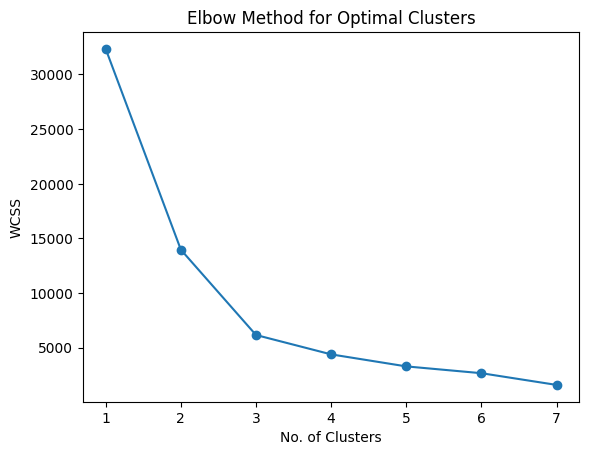

In [ ]:
plt.plot(range(1, 8),wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

/tmp/ipython-input-871057152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(X_scaled)


Supervised Learning


In [ ]:
label_cols = ['Fulfilment', 'Category']
le = LabelEncoder()
for col in label_cols:
  data[col] = le.fit_transform(data[col].astype(str))

/tmp/ipython-input-3165177962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col].astype(str))
/tmp/ipython-input-3165177962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col].astype(str))


In [ ]:
X = data[['Fulfilment', 'Amount']]
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} -> Accuracy: {acc:.2f}, F1 Score: {f1:.2f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression -> Accuracy: 0.60, F1 Score: 0.51
SVM -> Accuracy: 0.68, F1 Score: 0.65
k-NN -> Accuracy: 0.82, F1 Score: 0.81
Random Forest -> Accuracy: 0.84, F1 Score: 0.84
XGBoost -> Accuracy: 0.79, F1 Score: 0.78


Hyperparameter Tuning(RandomForestClassifier)



In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.84321608040201


Final Report from Sales Dataset



In [ ]:
from sklearn.metrics import classification_report

In [ ]:
best_model = grid_search.best_estimator_
y_pred_final = best_model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_final))


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.54      0.18      0.27        38
           2       0.92      0.22      0.36        54
           3       0.33      0.14      0.20         7
           4       0.85      0.89      0.87      2410
           5       0.73      0.52      0.61       414
           6       0.82      0.93      0.87      1191
           7       0.86      0.86      0.86      2312

    accuracy                           0.84      6468
   macro avg       0.63      0.47      0.51      6468
weighted avg       0.84      0.84      0.84      6468



In [ ]:
data.to_csv("cleaned_amazon_sales.csv", index=False)
print("\nCleaned and labeled dataset saved successfully.")


Cleaned and labeled dataset saved successfully.


In [ ]:
top_states = data['ship-state'].value_counts().head(5)
top_categories = data['Category'].value_counts().head(5)
total_revenue = data['Amount'].sum()

print("\nTop 5 Shipping States:\n", top_states)
print("\nTop 5 Categories:\n", top_categories)
print(f"\nTotal Revenue: ₹{total_revenue:,.2f}")



Top 5 Shipping States:
 ship-state
MAHARASHTRA      5418
KARNATAKA        4001
UTTAR PRADESH    2802
TELANGANA        2706
TAMIL NADU       2696
Name: count, dtype: int64

Top 5 Categories:
 Category
4    12087
7    11636
6     5840
5     2158
2      253
Name: count, dtype: int64

Total Revenue: ₹21,061,286.00


In [ ]:
data = pd.read_csv("/content/cleaned_amazon_sales.csv")
data

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Cluster
0,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,0,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,7,...,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,1
1,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,0,Amazon.in,Standard,JNE3405,JNE3405-KR-S,7,...,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,1
2,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,0,Amazon.in,Standard,JNE3405,JNE3405-KR-XS,7,...,INR,399.0,Amravati.,MAHARASHTRA,444606.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,1
3,14,408-1298370-1920302,2022-04-30,Shipped - Delivered to Buyer,0,Amazon.in,Standard,J0351,J0351-SET-L,4,...,INR,771.0,MUMBAI,MAHARASHTRA,400053.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2
4,15,403-4965581-9520319,2022-04-30,Shipped - Delivered to Buyer,0,Amazon.in,Standard,PJNE3368,PJNE3368-KR-6XL,7,...,INR,544.0,GUNTAKAL,ANDHRA PRADESH,515801.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32333,128872,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,0,Amazon.in,Standard,J0243,J0243-DR-S,2,...,INR,999.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,0
32334,128873,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,0,Amazon.in,Standard,J0079,J0079-SKD-S,4,...,INR,1523.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,0
32335,128874,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,0,Amazon.in,Standard,J0009,J0009-SKD-S,4,...,INR,854.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2
32336,128887,405-6493630-8542756,2022-05-31,Shipped - Delivered to Buyer,0,Amazon.in,Standard,J0301,J0301-TP-M,5,...,INR,518.0,NOIDA,UTTAR PRADESH,201301.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,1
